In [77]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
path = "../../../data/estates/*.csv" 

csv_files = glob.glob(path)

# Read the first file with header
df_list = []
df_first = pd.read_csv(csv_files[0])  # Read with header
df_list.append(df_first)

# Read the remaining files without headers, using the first file's columns
for file in csv_files[1:]:
    df = pd.read_csv(file, header=None, names=df_first.columns)
    df_list.append(df)

# Concatenate all DataFrames
final_df = pd.concat(df_list, ignore_index=True)

# Display result
print(final_df.head())

        Brand New Premium 3 Bedroom in Lekki Phase 1      ₦ 150,000 per day  \
0                      New Two Bedroom in Jahi Abuja      ₦ 130,000 per day   
1  3 Bedroom Terrace in Naf Valley Estate, Asokor...          ₦ 115,000,000   
2      1bdrm Apartment in City College Karu for rent  ₦ 1,500,000 per annum   
3                      4bdrm Duplex in Ajah for sale          ₦ 125,000,000   
4  1bdrm Shared Apartment in Salem, Ikate-Elegush...  ₦ 2,700,000 per annum   

    Lekki, Lekki Phase 1   500  3     Unfurnished 3.1  \
0      Abuja (FCT), Jahi   500  2     Unfurnished   2   
1   Abuja (FCT), Asokoro   500  2     Unfurnished   2   
2      Abuja (FCT), Karu  1000  1  Semi-Furnished   2   
3      Lagos State, Ajah   250  4     Unfurnished   4   
4  Lekki, Ikate-Elegushi  1236  1     Unfurnished   1   

  Brand New Premium 3 bedroom in Lekki phase 1\nAvailable from: today \nFeatures:\nPS5\nSwimming pool\n24/7...  \
0                     Refundable Caution Fee applies                

In [80]:
final_df.columns = ['title', 'price', 'location', 'sqm', 'bedrooms', 'furnishing', 'bathrooms', 'description', 'id', 'status']

In [83]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23549 entries, 0 to 23548
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        23549 non-null  object
 1   price        23549 non-null  object
 2   location     23549 non-null  object
 3   sqm          23549 non-null  object
 4   bedrooms     23549 non-null  object
 5   furnishing   23549 non-null  object
 6   bathrooms    23549 non-null  object
 7   description  23549 non-null  object
 8   id           23549 non-null  object
 9   status       23549 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


In [85]:
final_df.shape

(23549, 10)

In [87]:
final_df.head()

,title,price,location,sqm,bedrooms,furnishing,bathrooms,description,id,status
0,New Two Bedroom in Jahi Abuja,"₦ 130,000 per day","Abuja (FCT), Jahi",500,2,Unfurnished,2,Refundable Caution Fee applies,41023971,active
1,"3 Bedroom Terrace in Naf Valley Estate, Asokor...","₦ 115,000,000","Abuja (FCT), Asokoro",500,2,Unfurnished,2,3 bedroom Terrace duplex for sale at NAF Valle...,28913134,active
2,1bdrm Apartment in City College Karu for rent,"₦ 1,500,000 per annum","Abuja (FCT), Karu",1000,1,Semi-Furnished,2,One bedroom bedroom apartment to let,43456277,active
3,4bdrm Duplex in Ajah for sale,"₦ 125,000,000","Lagos State, Ajah",250,4,Unfurnished,4,pretty decent 4 bed semi-detached duplex with ...,44773477,active
4,"1bdrm Shared Apartment in Salem, Ikate-Elegush...","₦ 2,700,000 per annum","Lekki, Ikate-Elegushi",1236,1,Unfurnished,1,To let: Spacious room upstairs in a shared apa...,41022289,active


In [89]:
import re

def extract_amount(value):
 
    value = re.sub(r"[₦,]", "", value)
    
    amount = re.search(r"\d+", value)  
    
    return int(amount.group()) if amount else None

converted_salaries = [extract_amount(s) for s in final_df['price']]
final_df['converted_prices'] = converted_salaries

In [91]:
# Function to clean location
def clean_location(value):
    match = re.match(r"(.+?)\s*\((.*?)\),?\s*(.+)", value)
    if match:
        return f"{match.group(3)}, {match.group(1)}"
    return value

# Function to clean furnishing
def clean_furnishing(value):
    valid_furnishings = {"Furnished", "Unfurnished", "Semi-Furnished"}
    return value if value in valid_furnishings else "Unknown"  # Replace invalid values

# Apply cleaning functions
final_df["location"] = final_df["location"].apply(clean_location)
final_df["furnishing"] = final_df["furnishing"].apply(clean_furnishing)


In [93]:
final_df.head()

,title,price,location,sqm,bedrooms,furnishing,bathrooms,description,id,status,converted_prices
0,New Two Bedroom in Jahi Abuja,"₦ 130,000 per day","Jahi, Abuja",500,2,Unfurnished,2,Refundable Caution Fee applies,41023971,active,130000.0
1,"3 Bedroom Terrace in Naf Valley Estate, Asokor...","₦ 115,000,000","Asokoro, Abuja",500,2,Unfurnished,2,3 bedroom Terrace duplex for sale at NAF Valle...,28913134,active,115000000.0
2,1bdrm Apartment in City College Karu for rent,"₦ 1,500,000 per annum","Karu, Abuja",1000,1,Semi-Furnished,2,One bedroom bedroom apartment to let,43456277,active,1500000.0
3,4bdrm Duplex in Ajah for sale,"₦ 125,000,000","Lagos State, Ajah",250,4,Unfurnished,4,pretty decent 4 bed semi-detached duplex with ...,44773477,active,125000000.0
4,"1bdrm Shared Apartment in Salem, Ikate-Elegush...","₦ 2,700,000 per annum","Lekki, Ikate-Elegushi",1236,1,Unfurnished,1,To let: Spacious room upstairs in a shared apa...,41022289,active,2700000.0


In [95]:
#Handling messy data

final_df["sqm"] = pd.to_numeric(final_df["sqm"], errors="coerce")
final_df["converted_prices"] = pd.to_numeric(final_df["converted_prices"], errors="coerce")
final_df.dropna(subset=["sqm", "converted_prices"], inplace=True)
final_df["sqm"] = final_df["sqm"].replace({'': None}).astype(float).fillna(0).astype(int)

In [97]:
def convert_bedrooms_bathrooms(value):
    if isinstance(value, str) and "more than" in value:
        number = int(value.split()[-1])
        return number + 1 
    return int(value) 

# Apply the function
final_df["bedrooms"] = final_df["bedrooms"].apply(convert_bedrooms_bathrooms)
final_df["bathrooms"] = final_df["bathrooms"].apply(convert_bedrooms_bathrooms)

In [99]:
print(final_df.dtypes)

title                object
price                object
location             object
sqm                   int64
bedrooms              int64
furnishing           object
bathrooms             int64
description          object
id                   object
status               object
converted_prices    float64
dtype: object


In [101]:
#Get all unique values

# for col in final_df.columns:
#     print(f"Column: {col}")
#     print(final_df[col].unique())
#     print("-" * 40)

In [103]:
print(final_df.isna().sum())

title               0
price               0
location            0
sqm                 0
bedrooms            0
furnishing          0
bathrooms           0
description         0
id                  0
status              0
converted_prices    0
dtype: int64


### Univariate Analysis (Distribution of Key Features)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


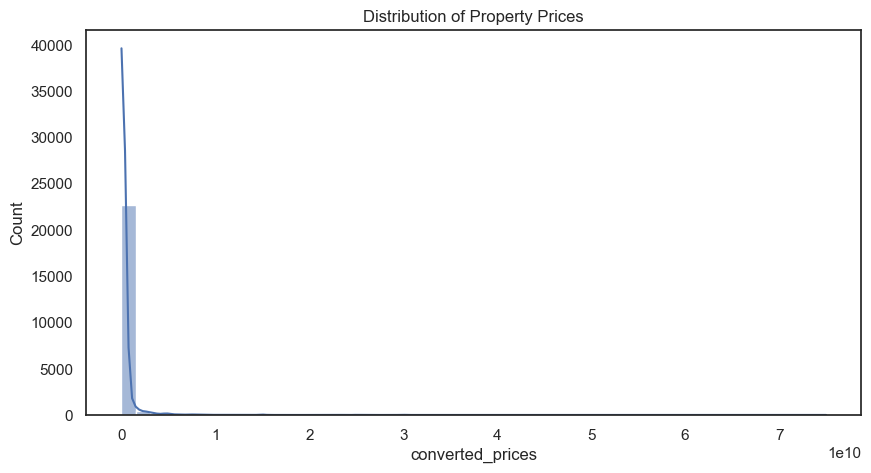

In [106]:
#check if prices are skewed or there are price clusters

plt.figure(figsize=(10, 5))
sns.histplot(final_df["converted_prices"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.show()

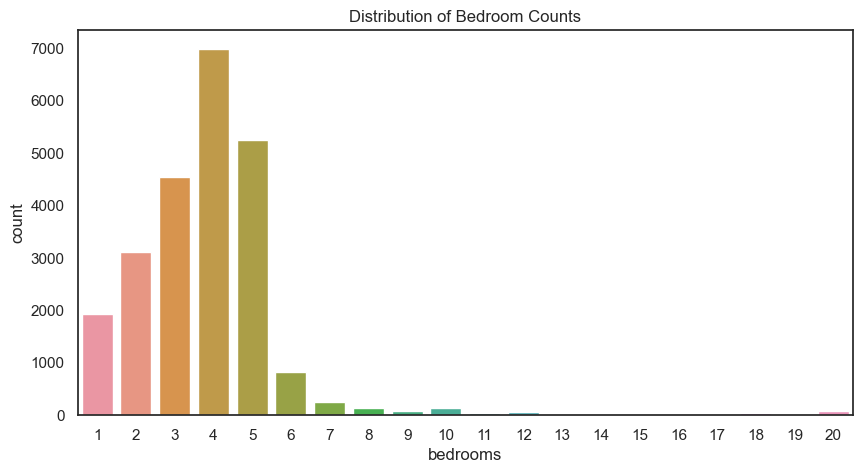

In [107]:
#Which bedroom counts are most common?

plt.figure(figsize=(10, 5))
sns.countplot(x=final_df["bedrooms"])
plt.title("Distribution of Bedroom Counts")
plt.show()

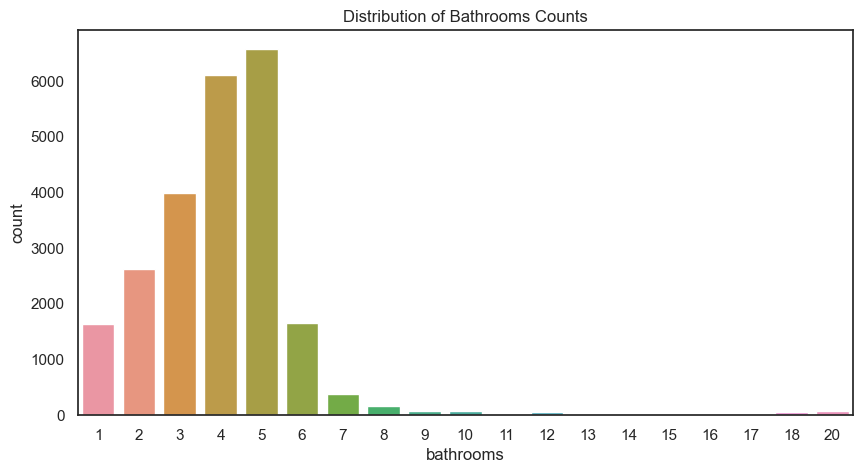

In [109]:
#Which bathroom counts are most common?

plt.figure(figsize=(10, 5))
sns.countplot(x=final_df["bathrooms"])
plt.title("Distribution of Bathrooms Counts")
plt.show()

### Bivariate Analysis (Feature Relationships)

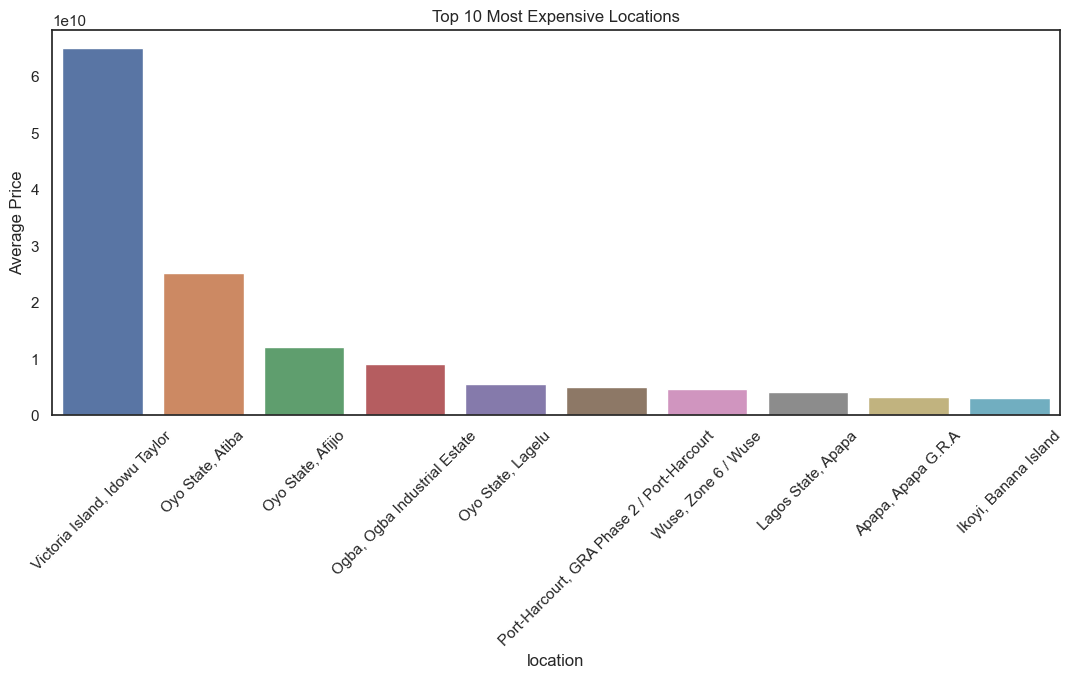

In [112]:
# Shows only the most expensive locations
top_locations = final_df.groupby("location")["converted_prices"].mean().sort_values(ascending=False).head(10)

# Plot the top 10 locations
plt.figure(figsize=(13, 5))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("Top 10 Most Expensive Locations")
plt.ylabel("Average Price")
plt.show()

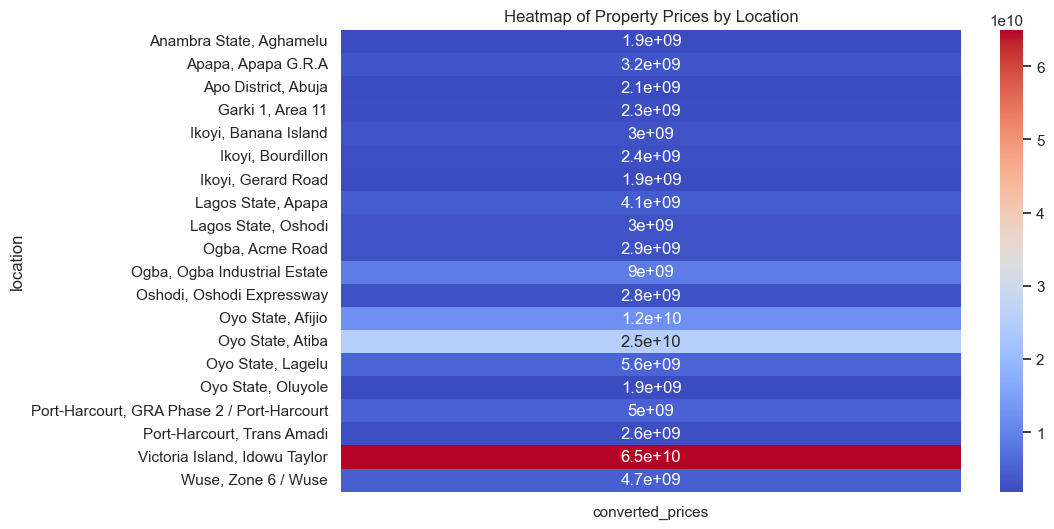

In [113]:
#Visually compares locations without clutter for clear comparison

location_prices = final_df.groupby("location")["converted_prices"].mean().reset_index()

# Sort and take top 20 locations
top_20 = location_prices.sort_values("converted_prices", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.heatmap(top_20.pivot_table(index="location", values="converted_prices"), cmap="coolwarm", annot=True)
plt.title("Heatmap of Property Prices by Location")
plt.show()

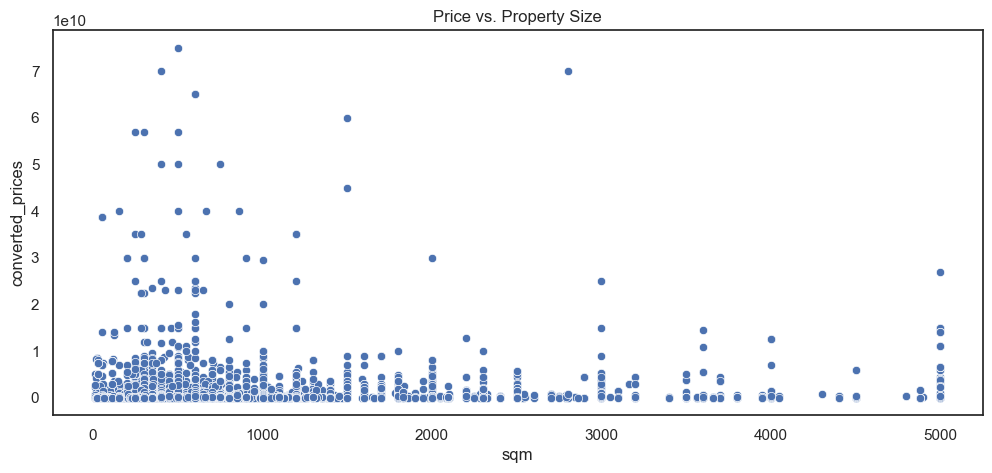

In [115]:
# check if there is a linear trend? or Do larger homes cost more?

plt.figure(figsize=(12, 5))
sns.scatterplot(x="sqm", y="converted_prices", data=final_df)
plt.title("Price vs. Property Size")
plt.show()

### Correlation Analysis

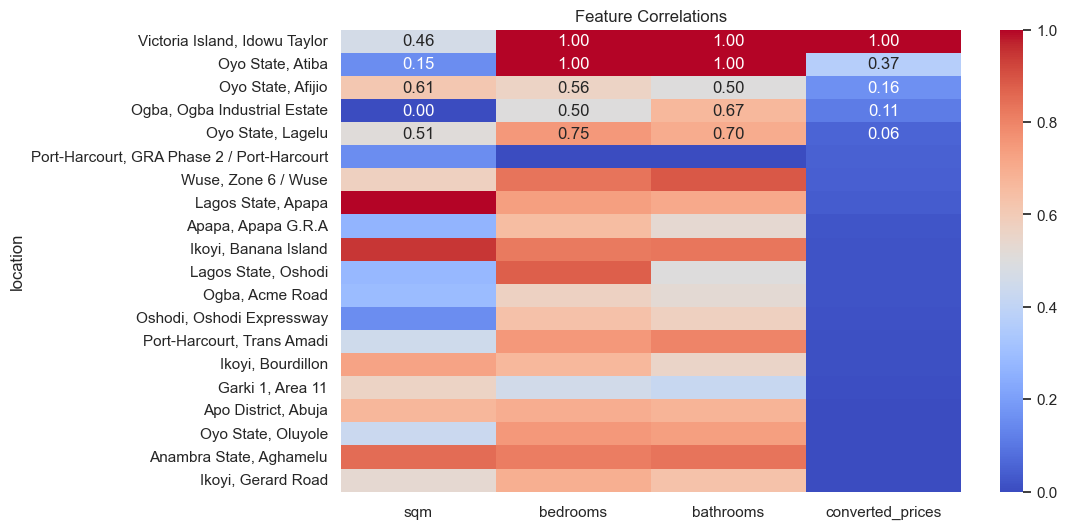

In [117]:
#To check if sqm or bedrooms correlate with price? or any features redundant?

columns_of_interest = ["location", "sqm", "bedrooms", "bathrooms", "converted_prices"]

df_selected = final_df[columns_of_interest]

# correlation_matrix = final_df[columns_of_interest].corr(method='spearman')

df_grouped = df_selected.groupby("location").mean().reset_index()

top_locations = df_grouped.sort_values("converted_prices", ascending=False).head(20)

top_locations.set_index("location", inplace=True)

top_locations_normalized = (top_locations - top_locations.min()) / (top_locations.max() - top_locations.min())

sns.set_theme(style='white')
plt.figure(figsize=(10, 6))
sns.heatmap(top_locations_normalized, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

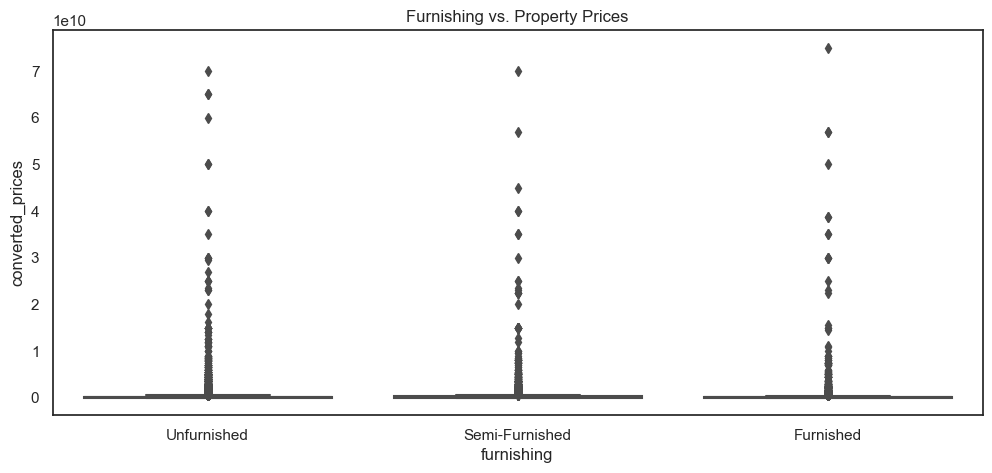

In [118]:
#check if furnished homes cost more?

plt.figure(figsize=(12, 5))
sns.boxplot(x="furnishing", y="converted_prices", data=final_df)
plt.title("Furnishing vs. Property Prices")
plt.show()

## Predicting Future housing prices based on the Analysis above

In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Convert furnishing to categorical codes (Label Encoding)
final_df["furnishing_code"] = LabelEncoder().fit_transform(final_df["furnishing"])

In [123]:
# Convert 'location' to categorical codes (Label Encoding)
final_df['current_prices'] = final_df["converted_prices"]
final_df["location_code"] = final_df["location"].astype("category").cat.codes

In [124]:
# Display sample
print(final_df[["furnishing", "furnishing_code", "location", "location_code", "sqm", "bathrooms", "bedrooms", "current_prices"]].head(20))

        furnishing  furnishing_code                    location  \
0      Unfurnished                2                 Jahi, Abuja   
1      Unfurnished                2              Asokoro, Abuja   
2   Semi-Furnished                1                 Karu, Abuja   
3      Unfurnished                2           Lagos State, Ajah   
4      Unfurnished                2       Lekki, Ikate-Elegushi   
5      Unfurnished                2              Asokoro, Abuja   
6      Unfurnished                2           Lagos State, Yaba   
7      Unfurnished                2            Ikoyi, Old Ikoyi   
8      Unfurnished                2              Maitama, Abuja   
9      Unfurnished                2           Lagos State, Ajah   
10     Unfurnished                2              Katampe, Abuja   
11     Unfurnished                2               Wuse 2, Abuja   
12     Unfurnished                2               Wuse 2, Abuja   
13     Unfurnished                2        Lekki, Lekki Phase 

In [125]:
features = ["location_code", "sqm", "bathrooms", "bedrooms","furnishing_code"]  # Predictor variables
target = "current_prices"  # Price we want to predict
X = final_df[features]
y = final_df[target]

### Training & Evaluating models 

In [128]:


# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}


# Train & evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    mae = mean_absolute_error(y_test, y_pred)  # Measure accuracy
    #Lower MAE = More Accurate Model
    print(f"{name} - Mean Absolute Error: ₦{mae:,.2f}")

Linear Regression - Mean Absolute Error: ₦480,222,478.72
Random Forest Regression - Mean Absolute Error: ₦425,456,526.44
Gradient Boosting - Mean Absolute Error: ₦437,292,642.84
XGBoost - Mean Absolute Error: ₦433,731,711.90


#### Predict Future Prices - Example

In [131]:
# Example: Predict price for a 3-bedroom, 2-bathroom, 500sqm house in "Ikoyi" (Location Code = 5)
best_model = models["Random Forest Regression"]

new_property = pd.DataFrame({
    "location_code": [371],  # Replace with actual location code
    "sqm": [500],
    "bathrooms": [3],
    "bedrooms": [5],
    "furnishing_code": [0],  # 2 = Unfurnished, 1 = Semi-Furnished, 0 = Furnished
})

# Predict future price
predicted_price = best_model.predict(new_property)
print(f"Predicted Price: ₦{predicted_price[0]:,.2f}")


Predicted Price: ₦1,469,622,238.10


### Saving the trained Model

In [137]:
import joblib
# Save trained model
joblib.dump(best_model, "price_prediction_model.pkl")

['price_prediction_model.pkl']

#### Generate Json file for the location drop down 

In [140]:
location_data = final_df[["location", "location_code"]].drop_duplicates()
location_json = location_data.to_json(orient="records", indent=4)

with open("locations.json", "w") as json_file:
    json_file.write(location_json)